In [376]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
import pandas as pd # For dataframes (tables)
from sklearn.model_selection import cross_val_score, KFold
from math import sqrt
from statistics import mean
import pickle
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


# We will use a library that I created for you
import os # To import external python files
import sys# To import external python files
sys.path.insert(0,os.path.abspath('../../course_library') ) # Replace this
                                                            # with the correct
                                                            # path
from andrea_models import AndreaLinearRegression # In the course library

In [377]:
dataset_to_use = 'A'
mydatasets_folder = "/home/araldo/datasets"
df = pd.read_csv(mydatasets_folder +'/video-qoe-processed/df.'+
                 dataset_to_use+'_2.csv')

We will start from one of the multi-variate linear regression models.

In [378]:
feature_filename = mydatasets_folder +'/video-qoe-processed/cols_3.pkl'
infile = open(feature_filename,'rb')
features = pickle.load(infile)
infile.close()

features

['RelativeTime',
 'BytesSent',
 'BytesSent0',
 'BytesReceived0',
 'BytesSent1',
 'BytesSent2',
 'BytesReceived2',
 'BytesSent3',
 'BytesReceived3',
 'BytesSent4',
 'BytesReceived4',
 'BytesSent5',
 'BytesReceived5',
 'BytesSent6',
 'BytesReceived6',
 'BytesSent7',
 'BytesReceived7',
 'BytesSent8',
 'BytesSent9',
 'BytesReceived9',
 'BytesSent12',
 'BytesSent13',
 'BytesSent15',
 'BytesSent25',
 'BytesReceived25',
 'PlaybackProgress',
 'Length',
 'BufferHealth',
 'KBytesReceived_log',
 'BytesSent_log']

In [379]:
def MyPolynomialRegression(degree=2, include_bias=False):
    return make_pipeline(PolynomialFeatures(degree, include_bias), 
                         AndreaLinearRegression())

In [380]:
#features=['BytesSent', 'BytesReceived','PacketsReceived']
features=['KBytesReceived_log']

X = df[features].values
y = df['BufferHealth'].values

k_fold = KFold(n_splits=5, shuffle=True, random_state=7)

# Regularize a linear model

Let's check again the cross validation error with the linear model

In [381]:
scores = cross_val_score(AndreaLinearRegression(), 
                         X, y, cv=k_fold,
                        scoring ="neg_mean_squared_error")
print("Cross validation error: ", sqrt(mean(-scores)) )

Cross validation error:  2.4130801461663203


Ridge regression with $\alpha=0$ is equivalent to LinearRegression

In [382]:
# Implementation of Ridge regression does not behave well with
# alpha=0, as it expects alpha > 0

scores = cross_val_score(Ridge(alpha=1e-9), X, y, cv=k_fold,
                        scoring ="neg_mean_squared_error")
print("Cross validation error: ", sqrt(mean(-scores)) )

Cross validation error:  2.413080146166123


Let's try with different alphas

,alphas,errors
0,1e-09,2.413080
1,0.5,2.412982
2,1,2.412885
3,5,2.412140
4,10,2.411287
5,1000000000.0,2.394870


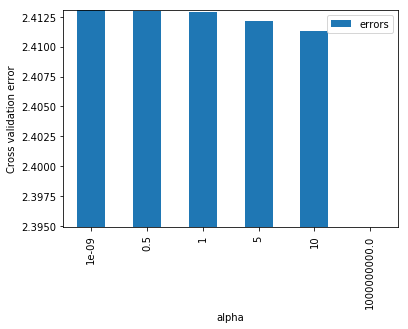

In [383]:
alpha_values = [1e-9, 0.5, 1, 5, 10, 1e9]
errors = []

for a in alpha_values:
    scores = cross_val_score(Ridge(alpha=a), X, y, cv=k_fold,
                            scoring ="neg_mean_squared_error")
    error = sqrt(mean(-scores))
    errors.append(error)

df_errors = pd.DataFrame({'alphas':[str(a) for a in alpha_values],
                          'errors':errors})
ax = df_errors.plot.bar(x='alphas')
ax.set( ylim=[min(errors),max(errors)], ylabel="Cross validation error",
      xlabel="alpha") #ylim=[242,265],

df_errors